# Optimizers
I have used different optimizers provided by PyTorch itself, like RMSProp, SGD, Adam and SGD with momentum, for comparitive study. For this a dummy dataset is used and a common basic network is trained over it using each of the optimizers. The final loss curve shows behaviour of cost function (Mean Squared Error Loss, torch.nn.MSELoss()) optimized by each optimizers. 

In [12]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F

from tqdm import tqdm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,10)

In [16]:
LR = 0.01
BATCH_SIZE = 512 #Large Batch size less variation in loss curve
EPOCH = 500

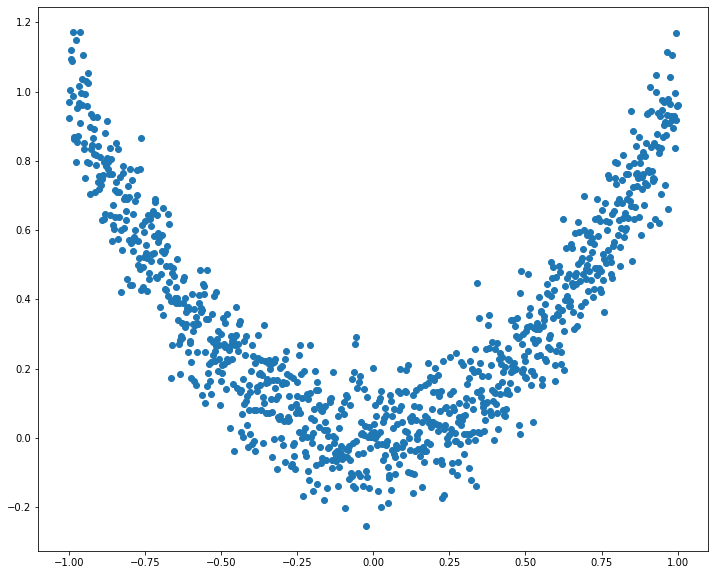

In [17]:
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

plt.scatter(x.numpy(), y.numpy())
plt.show()

In [18]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,)

In [19]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)   # hidden layer
        self.predict = torch.nn.Linear(20, 1)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [20]:
net_SGD         = Net()
net_Momentum    = Net()
net_RMSprop     = Net()
net_Adam        = Net()

nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

In [21]:
opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))

optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

In [22]:
loss_func = torch.nn.MSELoss()#Mean Squared Error Loss 
losses_his = [[], [], [], []] 

In [23]:
for epoch in tqdm(range(EPOCH)):
    for step, (b_x, b_y) in enumerate(loader)
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)              
            loss = loss_func(output, b_y)  
            opt.zero_grad()                
            loss.backward()                
            opt.step()                     
            l_his.append(loss.data.numpy())

100%|██████████| 500/500 [00:35<00:00, 14.21it/s]


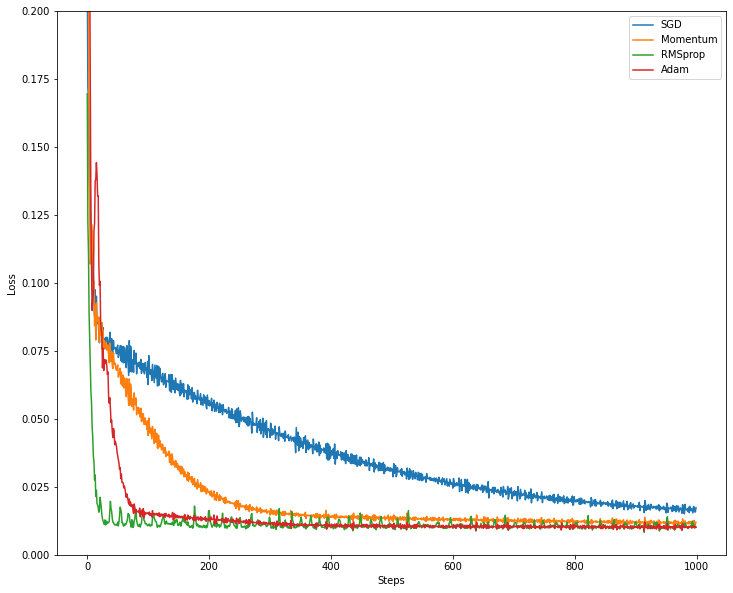

In [24]:
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()

# END